In [1]:
import numpy as np
import matplotlib.pyplot as plt

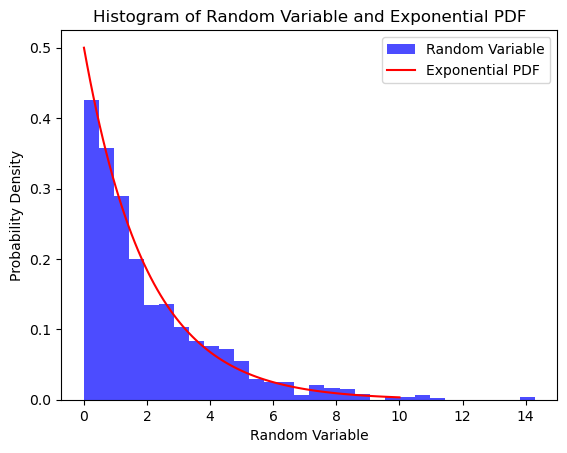

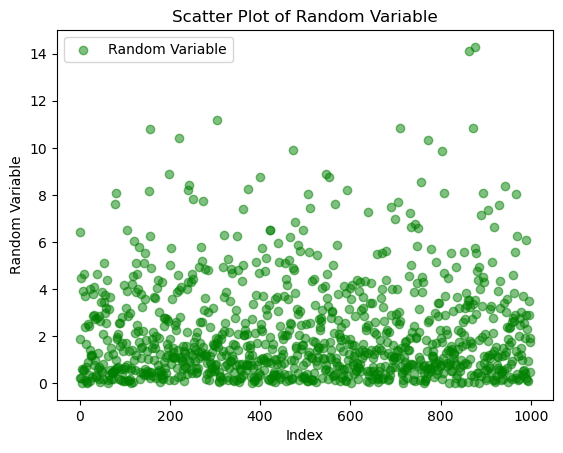

In [2]:
# PDF
def exponential_pdf(x, lambd):
    return lambd * np.exp(-lambd * x)
# CDF
def exponential_cdf(x, lambd):
    return 1 - np.exp(-lambd * x)
#
def exponential_inverse_cdf(u, lambd):
    return -np.log(1 - u) / lambd
#
def generate_random_variable(n, lambd):
    u = np.random.rand(n) # n [0, 1]
    random_variable = exponential_inverse_cdf(u, lambd) #
    return random_variable
    
lambd = 0.5
n = 1000
#
random_variable = generate_random_variable(n, lambd)
#
plt.hist(random_variable, bins=30, density=True, alpha=0.7, color='blue', 
         label='Random Variable')

# PDF
x_values = np.linspace(0, 10, 100)
pdf_values = exponential_pdf(x_values, lambd)

plt.plot(x_values, pdf_values, color='red', label='Exponential PDF')
plt.xlabel('Random Variable')
plt.ylabel('Probability Density')
plt.title('Histogram of Random Variable and Exponential PDF')
plt.legend()
plt.show()
plt.scatter(range(len(random_variable)), random_variable, color='green', 
            alpha=0.5, label='Random Variable')
plt.xlabel('Index')
plt.ylabel('Random Variable')
plt.title('Scatter Plot of Random Variable')
plt.legend()
plt.show()

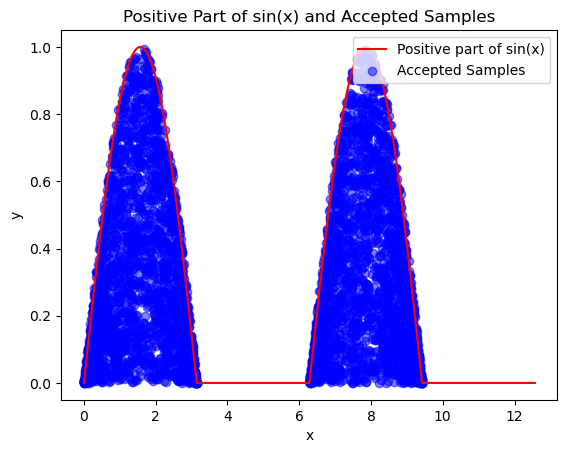

In [3]:
# Number of samples
n = 10000

# Generate x and y random samples from uniform distribution
x = np.random.uniform(0, 4*np.pi, n)
y = np.random.uniform(0, 1, n) * np.sin(x) # Only positive values of sin(x)

# Accept only samples for which y falls under sin(x) and y is positive
accepted_samples = [(x[i], y[i]) for i in range(n) if y[i] > 0]

# Separate accepted x and y samples
accepted_x = [sample[0] for sample in accepted_samples]
accepted_y = [sample[1] for sample in accepted_samples]

# Plot only the positive part of sin(x)
x_values = np.linspace(0, 4*np.pi, 1000)
sin_values = np.sin(x_values)
positive_sin_values = np.maximum(sin_values, 0) # Take the positive part of sin(x)
plt.plot(x_values, positive_sin_values, color='red', label='Positive part of sin(x)')

# Plot accepted samples
plt.scatter(accepted_x, accepted_y, color='blue', label='Accepted Samples', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Positive Part of sin(x) and Accepted Samples')
plt.legend()
plt.show()

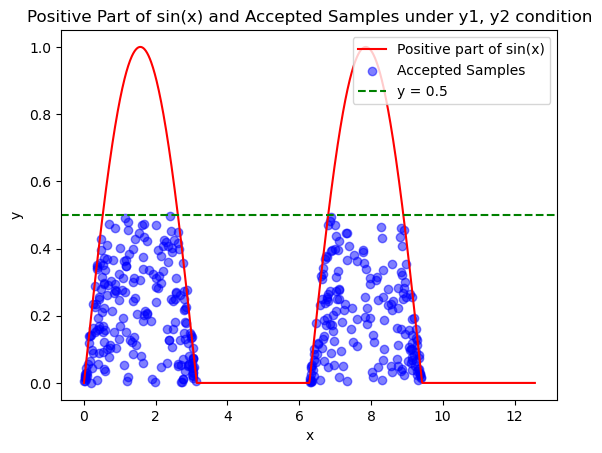

In [4]:
# Number of samples
n = 1000

# Generate x and y random samples from uniform distribution
x = np.random.uniform(0, 4*np.pi, n)
y1 = np.random.uniform(0, 1, n) * np.sin(x) # Only positive values of sin(x)

# Accept only samples for which y1 is under sin(x) and y1 is under 0.5
accepted_samples = [(x[i], y1[i]) for i in range(n) if y1[i] > 0 and y1[i] <= 0.5]

# Separate accepted x and y samples
accepted_x = [sample[0] for sample in accepted_samples]
accepted_y = [sample[1] for sample in accepted_samples]

# Plot only the positive part of sin(x)
x_values = np.linspace(0, 4*np.pi, 1000)
sin_values = np.sin(x_values)
positive_sin_values = np.maximum(sin_values, 0) # Take the positive part of sin(x)
plt.plot(x_values, positive_sin_values, color='red', label='Positive part of sin(x)')

# Plot accepted samples
plt.scatter(accepted_x, accepted_y, color='blue', label='Accepted Samples', alpha=0.5)
plt.axhline(y=0.5, color='green', linestyle='--', label='y = 0.5')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Positive Part of sin(x) and Accepted Samples under y1, y2 condition')
plt.legend(loc=1)
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df = pd.read_csv("advertising.csv")

In [6]:
X = df[["TV"]]
y = df[["sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
reg_model = LinearRegression().fit(X_train, y_train) # y_hat = b0 + b1*TV
print(reg_model.intercept_[0]) # b0
print(reg_model.coef_[0][0]) #b1
b0 = reg_model.intercept_[0]
b1 = reg_model.coef_[0][0]
y_hat = lambda x: b0 + b1*x

6.799773449796857
0.049275095667046014


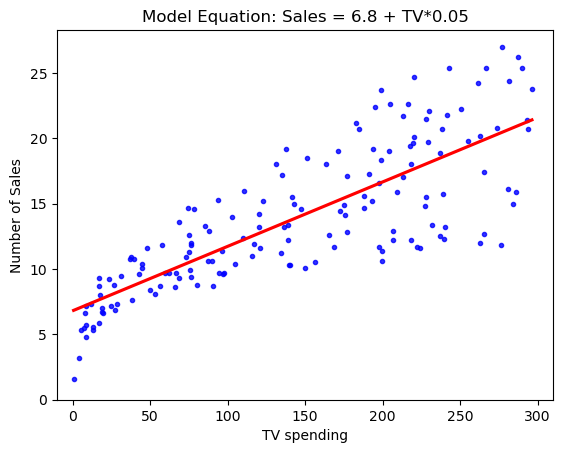

In [7]:
g = sns.regplot(x=X_train, y=y_train, scatter_kws={"color": "b", "s": 9}, ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(b0, 2)} + TV*{round(b1, 2)}")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV spending")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [8]:
#Average y values(sales)
print(f"Average of y values: {y.mean()}") # 14.02

# Standard Deviation of y values(sales)
print(f"Standard deviation of y values: {y.std()}") # 5.22

# Train MSE
y_pred = reg_model.predict(X_train)
print(f"Train MSE: {mean_squared_error(y_train, y_pred)}") # 10.45

# Train R-square
print(f"Train R-square: {reg_model.score(X_train, y_train)}") # 0.63

#Test MSE
y_pred = reg_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}") # 10.85

# Test R-square
print(f"Test R-square: {reg_model.score(X_test, y_test)}") # 0.41

Average of y values: sales   14.02
dtype: float64
Standard deviation of y values: sales   5.22
dtype: float64
Train MSE: 10.454336617171425
Train R-square: 0.6393874827744095
Test MSE: 10.859345325608267
Test R-square: 0.41535307148347866


In [9]:
import statsmodels.api as sm
X = df[["TV"]]
y = df[["sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # add Intercept term
model_time1 = sm.OLS(y_train, X_train)
results_time1 = model_time1.fit()
print(results_time1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     280.1
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           8.01e-37
Time:                        15:42:42   Log-Likelihood:                -414.79
No. Observations:                 160   AIC:                             833.6
Df Residuals:                     158   BIC:                             839.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7998      0.492     13.832      0.0

In [10]:
X = df[["TV"]]
y = df[["sales"]].
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train] # add Intercept term
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) # y_hat = b0 + b1*TV
print("Intercept:", coefficients[0])
print("Coefficient for TV:", coefficients[1])

Intercept: [6.79977345]
Coefficient for TV: [0.0492751]


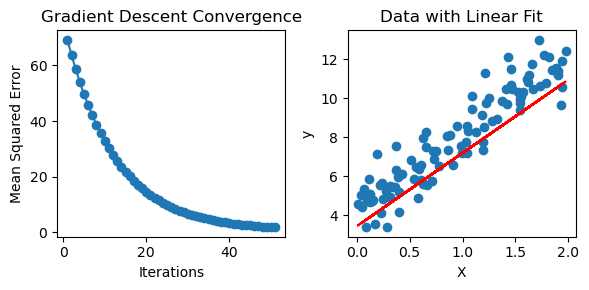

In [11]:
# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X+ 2*np.sin(X)**2 + np.random.randn(100, 1)
# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]
# Define gradient descent function
def gradient_descent(X, y, learning_rate=0.001, num_iterations=100):
    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1)) # Initialize weights
    history = []
    saved_weights = []
    for iteration in range(num_iterations):
        y_pred = X.dot(weights) # Predictions
        error = y_pred - y # Error
        # Compute gradients
        gradients = 2 / num_samples * X.T.dot(error)
        # Update parameters
        weights -= learning_rate * gradients
        # Compute MSE
        mse = np.mean(np.square(error))
        history.append(mse)
        # Save weights for every 10 iterations
        if iteration % 10 == 0:
            saved_weights.append(weights.copy())
    return saved_weights, history
    
# Perform gradient descent
learning_rate = 0.01
num_iterations = 51
optimal_weights, mse_history = gradient_descent(X_b, y, learning_rate, num_iterations)

# Visualize the update of parameters
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iterations + 1), mse_history, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.subplot(1, 2, 2)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data with Linear Fit')
plt.plot(X, X_b.dot(optimal_weights[-1]), color='red')
plt.tight_layout()
plt.show()

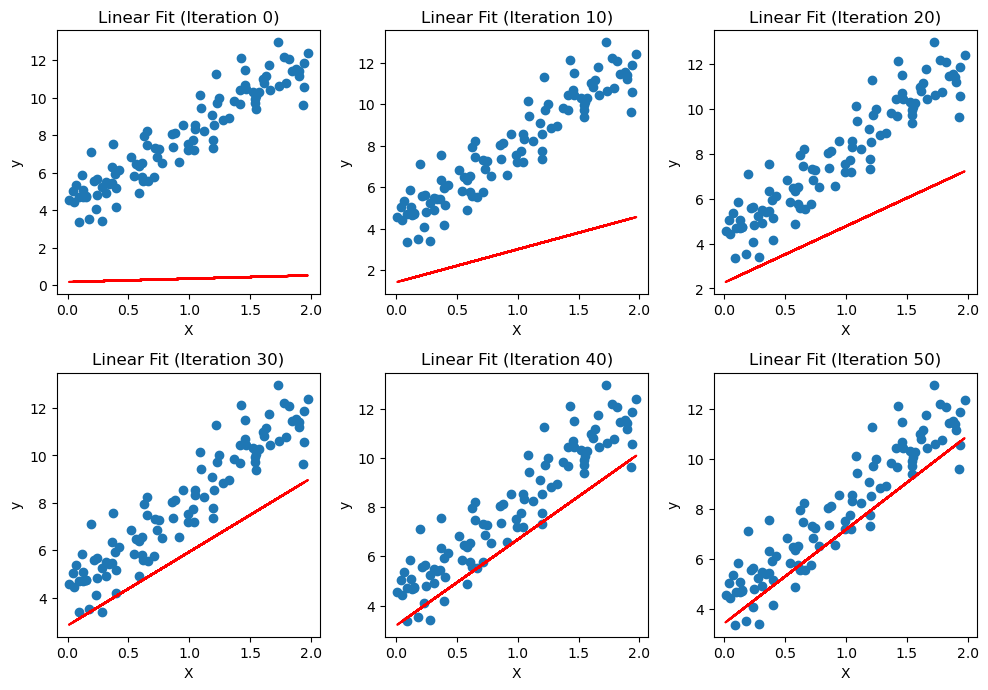

In [12]:
# Plot the linear fits for saved weights
plt.figure(figsize=(10,10))
for i, weights in enumerate(optimal_weights):
    plt.subplot(3, 3, i + 1)
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Linear Fit (Iteration {i*10})')
    plt.plot(X, X_b.dot(weights), color='red')
plt.tight_layout()
plt.show()

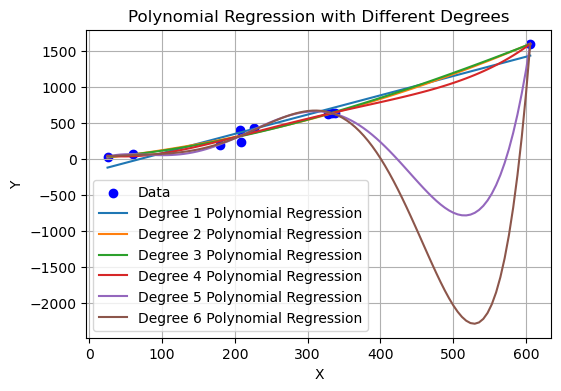

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# Provided data
x_data = np.array([338., 333., 328., 226., 25., 179., 60., 208., 207, 606.]).reshape(-1, 1)
y_data = np.array([640., 633., 619., 428., 27., 193., 66., 226., 393, 1591.])

# Define degrees for polynomial regression
degrees = [1, 2, 3, 4, 5, 6]

# Plot the original data
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data', color='blue')

# Fit polynomial regression models with different degrees
for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x_data)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_poly, y_data)
    
    # Predict
    x_fit = np.linspace(min(x_data), max(x_data), 100).reshape(-1, 1)
    x_fit_poly = polynomial_features.transform(x_fit)
    y_pred = model.predict(x_fit_poly)
    
    # Plot the regression line
    plt.plot(x_fit, y_pred, label=f'Degree {degree} Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.grid(True)
plt.show()